In [62]:
#Initialisierung importieren
import matplotlib.pyplot as plt
import numpy as np

#Qiskit importieren
from qiskit import *
from qiskit.tools import job_monitor
from qiskit.quantum_info import Statevector
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

#Visualisierungshilfen importieren
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.tools import vector2latex
from qiskit.visualization import plot_distribution

In [63]:
#Hadamard-Gatter auf alle Qubits
def initialize(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

In [64]:
#Simulation
def simulate_state_vector(qc):
    state = Statevector(qc)
    return state

In [65]:
#Erstellen von Quantenschaltung mit 2 Qubits
n = 1
deutsch_circuit = QuantumCircuit(n+1, n)

In [66]:
#Umkehrung des Kontrollqubits von Zustand |0> auf |1>
deutsch_circuit.h(1)
deutsch_circuit.z(1)
deutsch_circuit.h(1)
deutsch_circuit.draw()

q_0: ───────────────
     ┌───┐┌───┐┌───┐
q_1: ┤ H ├┤ Z ├┤ H ├
     └───┘└───┘└───┘
c: 1/═══════════════

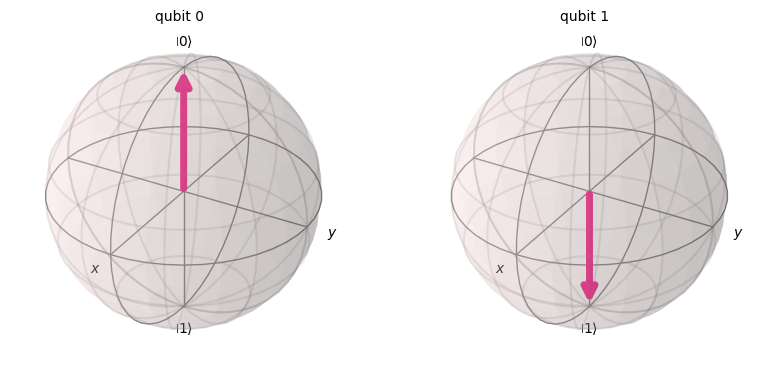

In [67]:
#Visualisierung Einheitskugel
plot_bloch_multivector(simulate_state_vector(deutsch_circuit))

In [68]:
#Visualisierung Zustandsvektor
vector2latex(simulate_state_vector(deutsch_circuit), pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

In [69]:
#Initialisierung
deutsch_circuit = initialize(deutsch_circuit, [0,1])
deutsch_circuit.draw()

┌───┐               
q_0: ┤ H ├───────────────
     ├───┤┌───┐┌───┐┌───┐
q_1: ┤ H ├┤ Z ├┤ H ├┤ H ├
     └───┘└───┘└───┘└───┘
c: 1/════════════════════

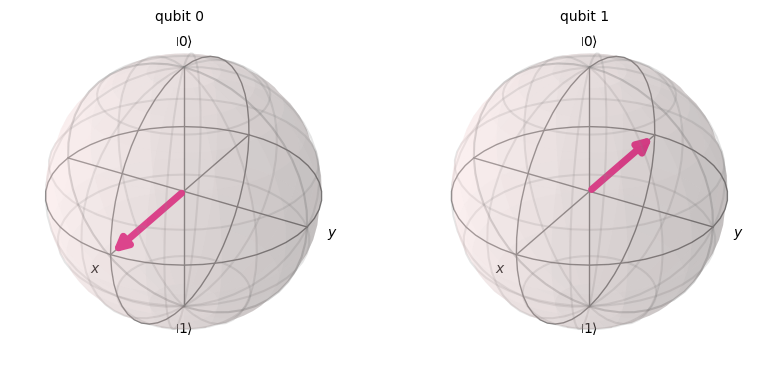

In [70]:
#Visualisierung Einheitskugel
plot_bloch_multivector(simulate_state_vector(deutsch_circuit))

In [71]:
#Visualisierung Zustandsvektor
vector2latex(simulate_state_vector(deutsch_circuit), pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

In [72]:
# Oracle
deutsch_circuit.cx(1,0)
deutsch_circuit.draw()

┌───┐               ┌───┐
q_0: ┤ H ├───────────────┤ X ├
     ├───┤┌───┐┌───┐┌───┐└─┬─┘
q_1: ┤ H ├┤ Z ├┤ H ├┤ H ├──■──
     └───┘└───┘└───┘└───┘     
c: 1/═════════════════════════

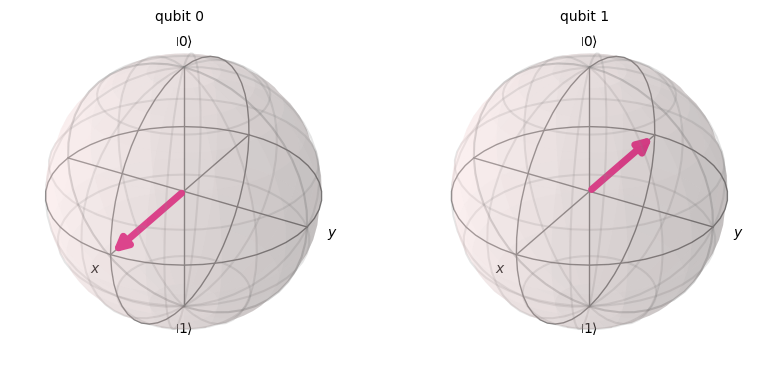

In [73]:
#Visualisierung Einheitskugel
plot_bloch_multivector(simulate_state_vector(deutsch_circuit))

In [74]:
#Visualisierung Zustandsvektor
vector2latex(simulate_state_vector(deutsch_circuit), pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

In [75]:
#Hadamard-Gatter auf Zielqubit
deutsch_circuit.h(0)
deutsch_circuit.draw()

┌───┐               ┌───┐┌───┐
q_0: ┤ H ├───────────────┤ X ├┤ H ├
     ├───┤┌───┐┌───┐┌───┐└─┬─┘└───┘
q_1: ┤ H ├┤ Z ├┤ H ├┤ H ├──■───────
     └───┘└───┘└───┘└───┘          
c: 1/══════════════════════════════

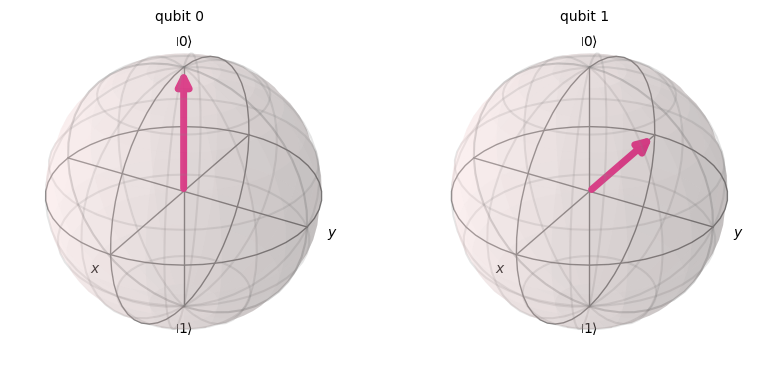

In [76]:
#Visualisierung Einheitskugel
plot_bloch_multivector(simulate_state_vector(deutsch_circuit))

In [77]:
#Visualisierung Zustandsvektor
vector2latex(simulate_state_vector(deutsch_circuit), pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

In [78]:
#Qubit messen
deutsch_circuit.measure(0,0)

#simulieren und ausgeben
service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")
job = Sampler(backend).run(deutsch_circuit, shots=1024)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cmbuosn4mi97k7j3h5cg
SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 1024, 'circuit_metadata': {}}])


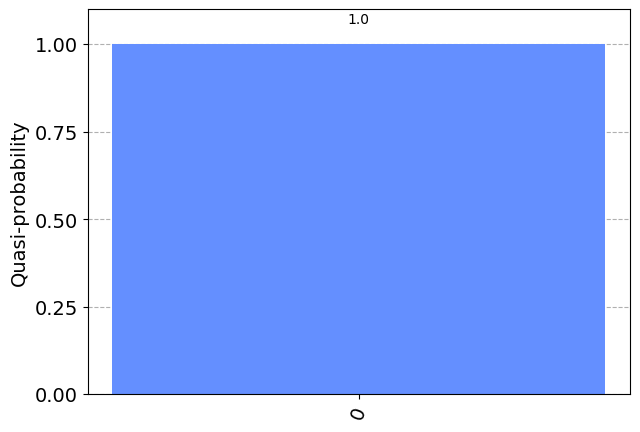

In [79]:
dist = result.quasi_dists[0]
plot_distribution(dist.binary_probabilities())